In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_x = pd.read_csv('linear_train_nolabels.csv', dtype = 'float64')
x_train = df_x.to_numpy()
x_train = np.delete(x_train, 0, axis = 1)

In [3]:
df_y = pd.read_csv('labelscsv.csv', header = None, dtype = 'float64')
y_train = df_y.to_numpy()
y_train = np.ravel(y_train)

In [4]:
x_train_mean = np.mean(x_train, axis = 0)
x_train_std = np.std(x_train, axis = 0)
x_train = (x_train - x_train_mean)/x_train_std
m = x_train.shape[0]
n = x_train.shape[1]
print(x_train)

[[-0.99722997  1.20760112  0.64714173 ... -0.42356685  0.14706176
  -1.81833211]
 [-1.50051622  2.00042615  0.79297113 ...  0.62858483 -0.831581
  -0.48062945]
 [-0.09112324 -0.44053485 -0.01483786 ...  2.46960382  1.67742154
   0.74836542]
 ...
 [-0.89224929  0.2364157   0.81271337 ... -0.81131613  0.87977983
  -1.42353235]
 [ 2.48439907  0.26340108 -0.56973691 ...  0.5299262   0.18599543
  -1.12663502]
 [-0.94520481  1.08626123 -1.06794097 ...  0.28871003  0.57003263
  -1.97345194]]


In [5]:
x_traintrain = np.delete(x_train, range(10000, 20000), axis  = 0)
nn = x_traintrain.shape[0]
x_traintest = x_train[10000:20000 , :]
y_traintrain = np.delete(y_train, range(10000,20000), axis = 0)
y_traintest = y_train[10000:20000]
y_meanmean = np.sum(y_traintest)/10000
print(nn)

40000


In [6]:
w_initial = np.zeros(n)
b_initial = 0
y_hat = np.zeros(m)
cost = 0
dj_dw = np.zeros(n)
dj_db = 0
tmp_alpha = 0.02
iterations = 1500
J_history = []
p_history = []

In [7]:
def model(x, w, b):
    y_hat = np.dot(x, w) + b
    return y_hat

In [8]:
def cost_func(y_hat, y):
    loss = np.square(y_hat - y) / 2
    cost = np.mean(loss) 
    return cost

In [9]:
def grad(x, y, y_hat):
    dj_dw = (np.dot(x.T, (y_hat - y)))/m
    dj_db = np.sum(y_hat - y)/m
    return dj_dw, dj_db

In [10]:
def gradient_descent(x, y, w, b, alpha, num_iters, cost_func, grad):
    
    for i in range(num_iters):
        y_hat = model(x, w, b)
        dj_dw, dj_db = grad(x, y, y_hat)     
        w -= alpha * dj_dw 
        b -= alpha * dj_db 
        J_history.append(cost_func(y_hat, y))
        p_history.append([w,b])
        if i > 0 and J_history[i-1] == J_history[i]:
            break
        
 
    return w, b, J_history, p_history

In [11]:
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_initial, b_initial, tmp_alpha, 
                                                    iterations, cost_func, grad)


In [12]:
#print(b_final, w_final,J_hist), 
print(np.dot(x_train, w_final) + b_final)

[-188.21969224   -3.77218518  482.05367712 ...   52.88055916  383.02027214
 -347.47800744]


In [13]:
iterations_ran = np.arange(len(J_hist))

In [14]:
print(len(J_hist))

855


In [15]:
#print(p_hist)

In [28]:
y_hat = model(x_traintest, w_final, b_final)

In [29]:
def r2score(y_hat, y, y_mean):
    yvb = 0
    yv = 0
    yb = 0
    for i in range(10000):
        yv += (y_hat[i] - y[i])**2
        yb += (y[i] - y_mean)**2
    yvb = 1 - (yv/yb)
    return yvb

In [30]:
r = r2score(y_hat, y_traintest, y_meanmean)
print(r)

0.8411149452674155


In [32]:
R = np.sum(np.abs(np.subtract(y_train[:10000], y_hat)))/m
print(R)

53.16848425070143


In [20]:
df_testx = pd.read_csv('linear_test_data.csv')

In [21]:
testx = df_testx.to_numpy()

In [22]:
testx = np.delete(testx, 0, axis = 1)

In [23]:
testx = (testx - x_train_mean)/x_train_std

In [24]:
testy = np.dot(testx, w_final) + b_final

In [25]:
df_testy = pd.DataFrame(testy, columns = ['labels'])

In [26]:
df_testy.to_csv('testylabels')

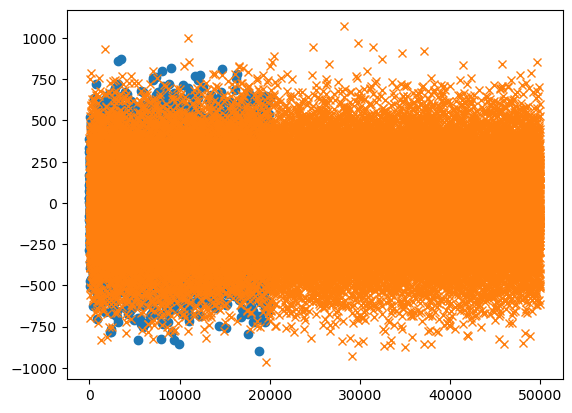

In [26]:
plt.plot(testy, marker = 'o', linestyle = 'None')
plt.plot(y_train, marker = 'x', linestyle  = 'None')
plt.show()

In [27]:
ylabels = np.dot(x_train, w_final) + b_final
print(ylabels - y_train)

[  29.79653926 -157.91303418   87.20397602 ...   56.32504813  -62.33650936
  153.44667326]


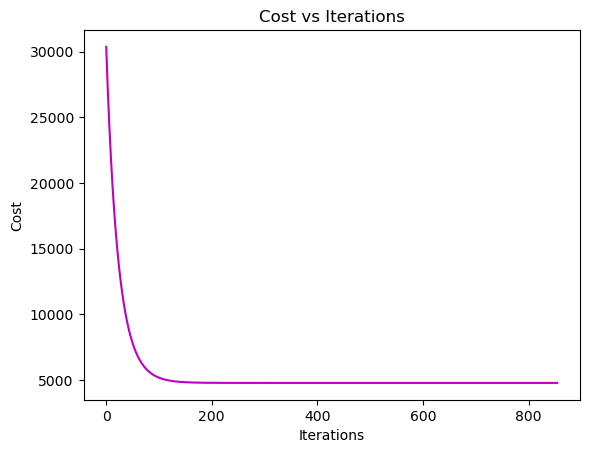

In [28]:
plt.plot(iterations_ran, J_hist, c ='m')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()